In [3]:

import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [4]:
!unzip -u ../input/facial-keypoints-detection/test.zip
!unzip -u ../input/facial-keypoints-detection/training.zip

Archive:  ../input/facial-keypoints-detection/test.zip
  inflating: test.csv                
Archive:  ../input/facial-keypoints-detection/training.zip
  inflating: training.csv            


In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [6]:
df=pd.read_csv('training.csv')

In [7]:
df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [8]:
df_test=pd.read_csv('test.csv')
df_test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [9]:
len(df.iloc[0]['Image'])

33593

In [10]:
df.shape

(7049, 31)

In [11]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [12]:
df.fillna(method = 'ffill',inplace = True)


In [13]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [14]:
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))


In [15]:
df['Image']

0       [[238, 236, 237, 238, 240, 240, 239, 241, 241,...
1       [[219, 215, 204, 196, 204, 211, 212, 200, 180,...
2       [[144, 142, 159, 180, 188, 188, 184, 180, 167,...
3       [[193, 192, 193, 194, 194, 194, 193, 192, 168,...
4       [[147, 148, 160, 196, 215, 214, 216, 217, 219,...
                              ...                        
7044    [[71, 74, 85, 105, 116, 128, 139, 150, 170, 18...
7045    [[60, 60, 62, 57, 55, 51, 49, 48, 50, 53, 56, ...
7046    [[74, 74, 74, 78, 79, 79, 79, 81, 77, 78, 80, ...
7047    [[254, 254, 254, 254, 254, 238, 193, 145, 121,...
7048    [[53, 62, 67, 76, 86, 91, 97, 105, 105, 106, 1...
Name: Image, Length: 7049, dtype: object

In [16]:
import matplotlib.pyplot as plt

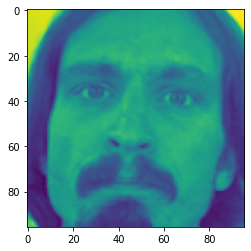

In [17]:
image=plt.imshow(df.loc[0]['Image'])

In [42]:
def plot_image(df, index):
    image = plt.imshow(df['Image'][index])
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l

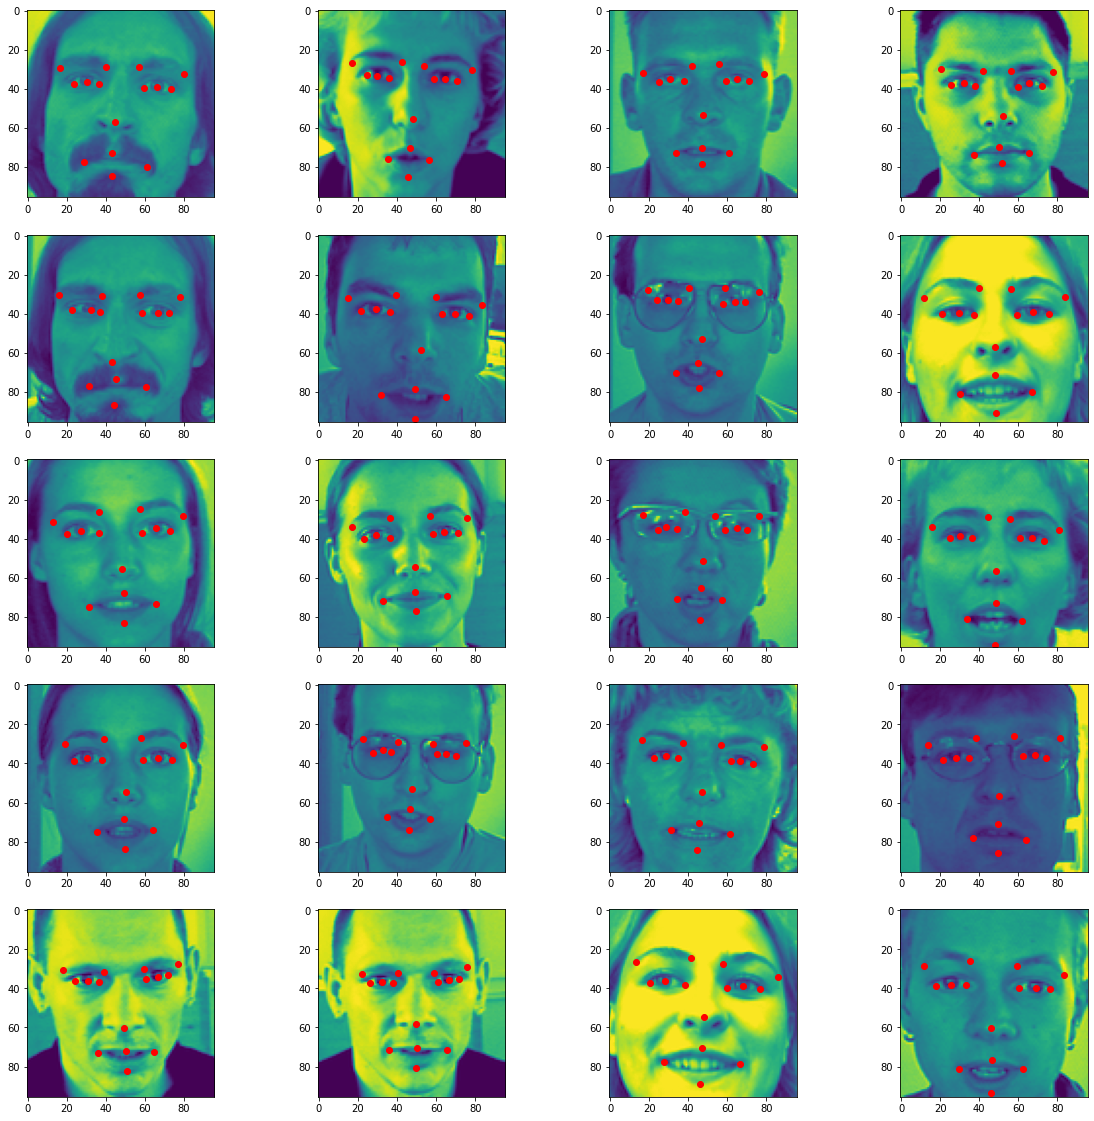

In [43]:
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(df, i)

plt.show()

In [20]:
img = []
for i in range(0,7049):
    im = df['Image'][i]
    img.append(im)

In [21]:
len(img),img[0].shape

(7049, (96, 96))

In [22]:
img = np.array(img,dtype = 'float')
img = np.asarray(img, dtype=np.uint8).reshape(img.shape[0],96,96,1)

In [52]:
img[0]

array([[[238],
        [236],
        [237],
        ...,
        [250],
        [250],
        [250]],

       [[235],
        [238],
        [236],
        ...,
        [249],
        [250],
        [251]],

       [[237],
        [236],
        [237],
        ...,
        [251],
        [251],
        [250]],

       ...,

       [[186],
        [183],
        [181],
        ...,
        [ 52],
        [ 57],
        [ 60]],

       [[189],
        [188],
        [207],
        ...,
        [ 61],
        [ 69],
        [ 78]],

       [[191],
        [184],
        [184],
        ...,
        [ 70],
        [ 75],
        [ 90]]], dtype=uint8)

In [23]:
img.shape

(7049, 96, 96, 1)

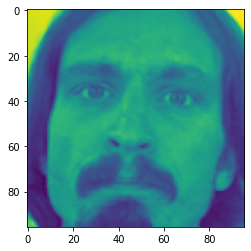

In [24]:
plt.imshow(img[0])

In [25]:
feature = df.drop('Image',axis = 1)
y = []
for i in range(0,7049):
    points = feature.iloc[i,:]

    y.append(points)
y = np.array(y,dtype = 'float')

In [26]:
y.shape

(7049, 30)

In [27]:
y[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_rest, y_train, y_rest = train_test_split(img, y, test_size=0.4, random_state=42)

In [29]:
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42)

In [30]:
x_train.shape,x_test.shape,x_val.shape

((4229, 96, 96, 1), (1410, 96, 96, 1), (1410, 96, 96, 1))

In [31]:
y_train.shape,y_test.shape,y_val.shape

((4229, 30), (1410, 30), (1410, 30))

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [33]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [34]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])


In [ ]:
history=model.fit(x_train,y_train,epochs = 500,batch_size = 64,validation_data=(x_val,y_val))

Epoch 1/500
67/67 [==============================] - 9s 52ms/step - loss: 432.4177 - mae: 13.1444 - val_loss: 63.0828 - val_mae: 6.9211
Epoch 2/500
67/67 [==============================] - 3s 38ms/step - loss: 24.6664 - mae: 3.8054 - val_loss: 46.4240 - val_mae: 5.8945
Epoch 3/500
67/67 [==============================] - 3s 38ms/step - loss: 20.6843 - mae: 3.4613 - val_loss: 28.3926 - val_mae: 4.4474
Epoch 4/500
67/67 [==============================] - 3s 38ms/step - loss: 17.1096 - mae: 3.1330 - val_loss: 11.4570 - val_mae: 2.5384
Epoch 5/500
67/67 [==============================] - 3s 38ms/step - loss: 14.7810 - mae: 2.9319 - val_loss: 7.6380 - val_mae: 1.8752
Epoch 6/500
67/67 [==============================] - 3s 38ms/step - loss: 13.0168 - mae: 2.7007 - val_loss: 6.2678 - val_mae: 1.6321
Epoch 7/500
67/67 [==============================] - 3s 38ms/step - loss: 12.4026 - mae: 2.6239 - val_loss: 5.5831 - val_mae: 1.4836
Epoch 8/500
67/67 [==============================] - 3s 38ms/st

In [36]:
model.save("facial.h5")

In [39]:
evaluate = model.evaluate(x_test, y_test)
evaluate

45/45 [==============================] - 0s 7ms/step - loss: 3.4617 - mae: 1.0868


[3.4616823196411133, 1.0867801904678345]

In [40]:
prediction=model.predict(x_test)

In [41]:
prediction[0]

array([64.754105, 33.132668, 28.7728  , 34.89582 , 58.34234 , 34.499992,
       71.61679 , 33.58033 , 35.6445  , 35.620594, 22.62076 , 35.931072,
       54.914646, 25.391193, 76.07303 , 23.768557, 38.41625 , 26.499077,
       16.18866 , 27.740685, 48.160866, 59.988388, 64.380226, 72.89964 ,
       33.519413, 74.37699 , 48.827965, 71.27029 , 48.753754, 80.42445 ],
      dtype=float32)

In [47]:
def plot_test_image(df,prediction, index):
    image = plt.imshow(df[index])
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(prediction[index][i-1], prediction[index][i], 'ro'))
        
    return image, l

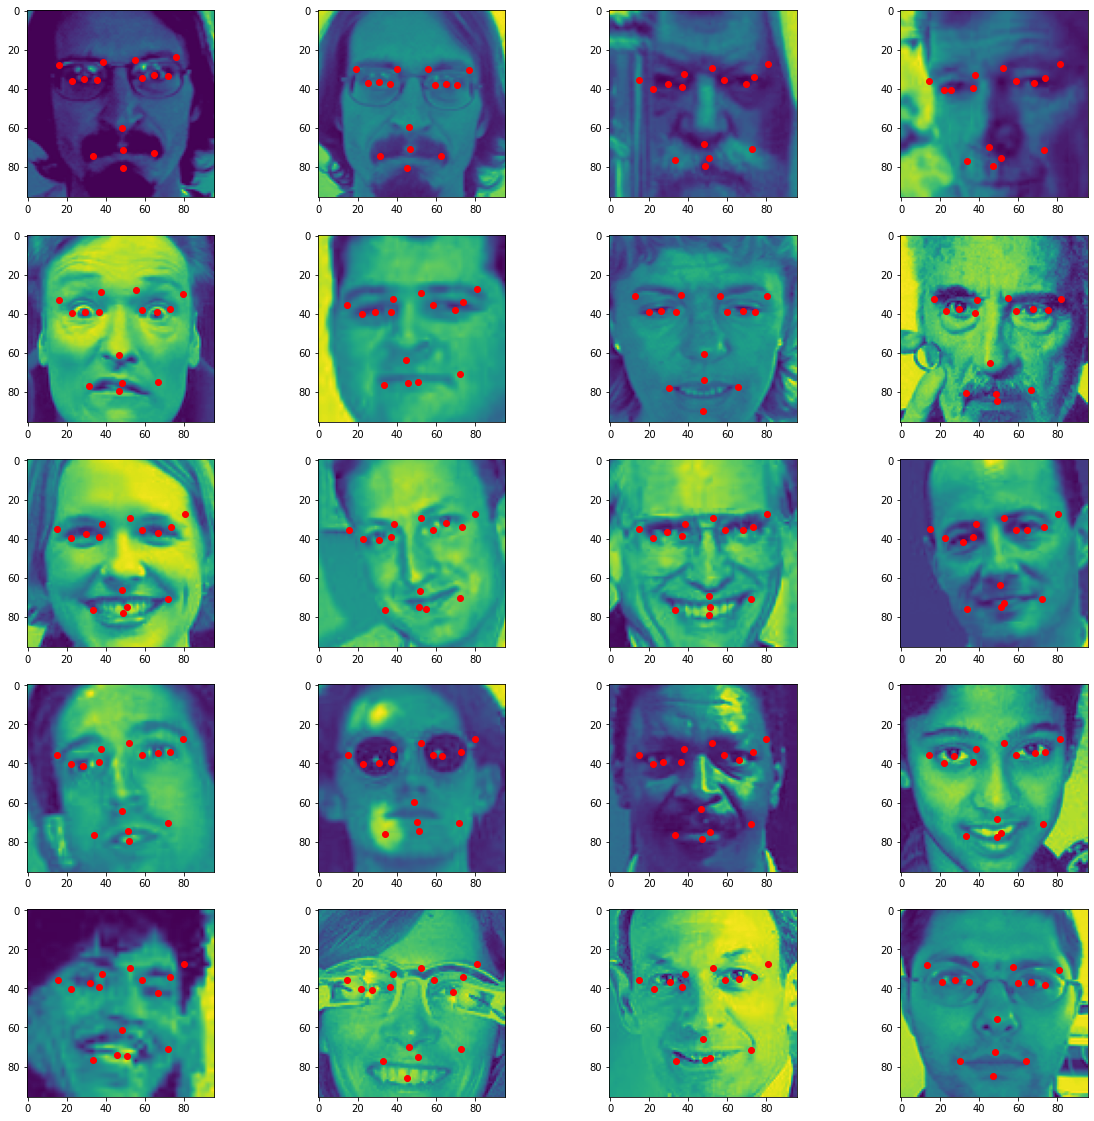

In [48]:
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_test_image(x_test,prediction, i)

plt.show()

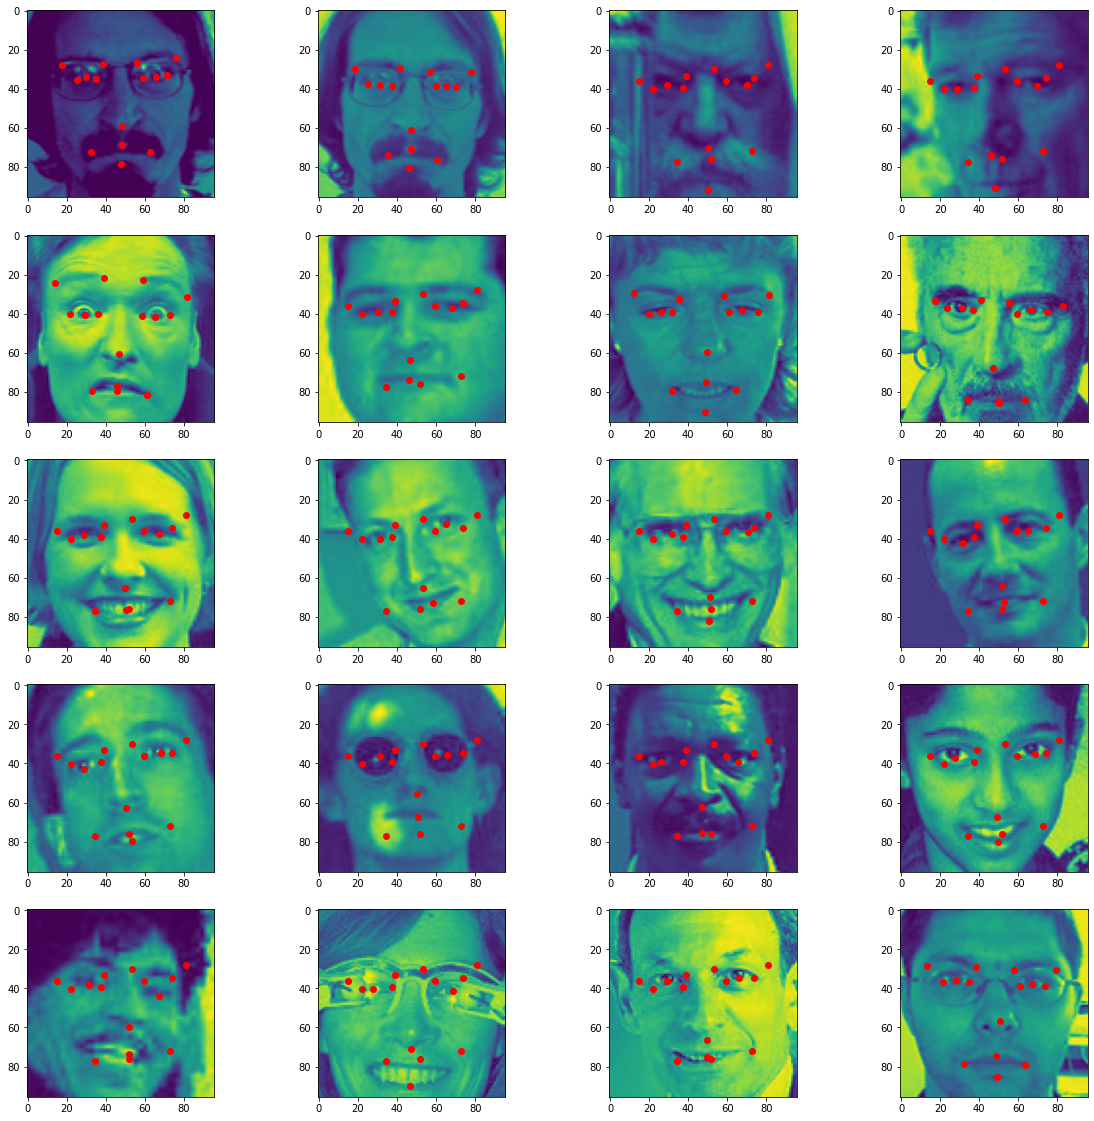

In [49]:
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_test_image(x_test,y_test, i)

plt.show()

In [50]:
df_test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [51]:
df_test['Image'] = df_test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))


In [55]:
df_test.shape

(1783, 2)

In [61]:
df_test.head()

ImageId                                              Image
0        1  [[182, 183, 182, 182, 180, 180, 176, 169, 156,...
1        2  [[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ...
2        3  [[177, 176, 174, 170, 169, 169, 168, 166, 166,...
3        4  [[176, 174, 174, 175, 174, 174, 176, 176, 175,...
4        5  [[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ...

In [56]:
img_test = []
for i in range(0,1783):
    im = df_test['Image'][i]
    img_test.append(im)

In [57]:
img_test = np.array(img_test,dtype = 'float')
img_test = np.asarray(img_test, dtype=np.uint8).reshape(img_test.shape[0],96,96,1)

In [58]:
test_prediction=model.predict(img_test)

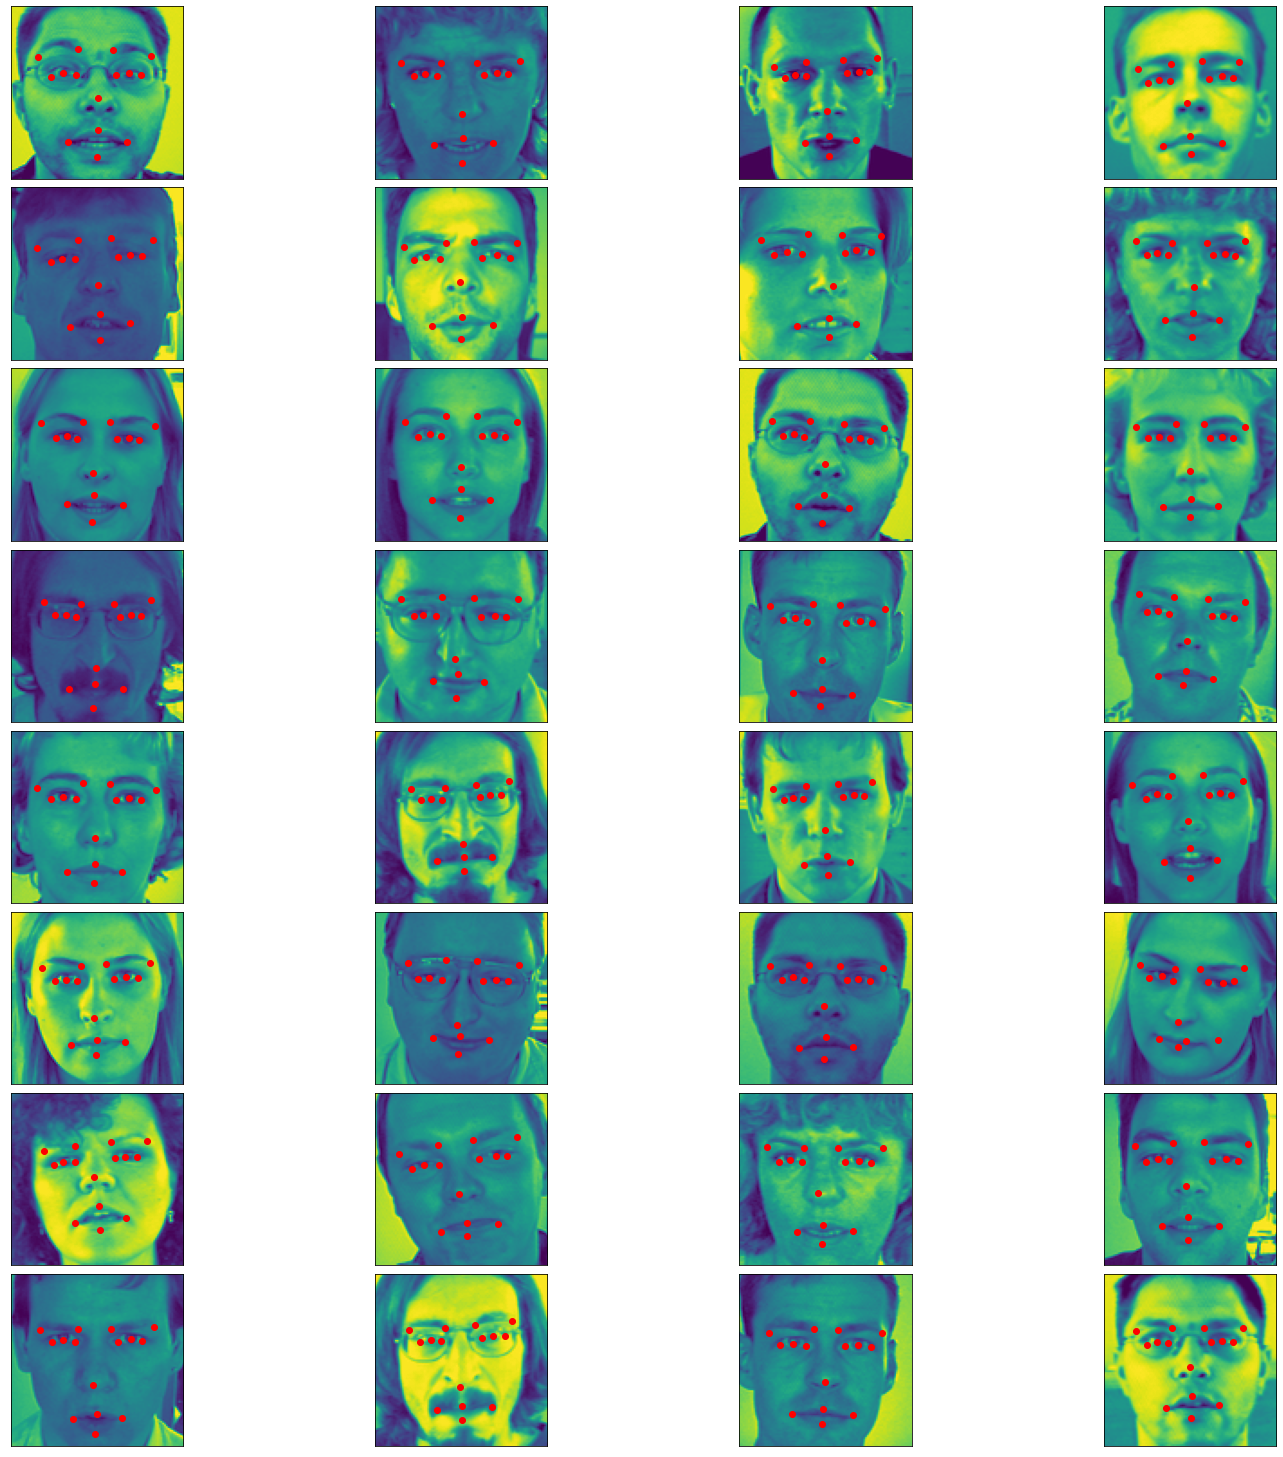

In [81]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 4, i + 1,xticks=[],yticks=[])
    plot_test_image(img_test,test_prediction, i)

plt.show()

In [69]:
col= list(df.columns)

In [70]:
col.pop()

'Image'

In [71]:
col

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [84]:
final = pd.DataFrame(test_prediction, columns = col)
final.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          65.400902          36.784950           28.750757   
1          67.472572          36.678383           27.250769   
2          66.266060          36.141731           30.552046   
3          65.409752          38.374184           30.031488   
4          66.099716          37.164040           28.082323   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.475952                58.375633                37.566818   
1           37.194817                59.972008                37.593872   
2           37.920666                59.205910                36.816566   
3           40.389713                57.883156                39.861511   
4           39.164875                59.025703                38.014442   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                72.306488                37.995121                 35.628246   
1                73.672554                37.447994                 34.167126   
2                71.444092                35.881367                 36.543133   
3                71.346481                39.610355                 36.186588   
4                72.789368                37.876808                 35.088951   

   right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                 37.712074  ...   47.835945   50.694244            64.048889   
1                 38.171806  ...   47.743759   59.614212            65.191383   
2                 38.498856  ...   48.020149   57.743935            64.512421   
3                 41.344448  ...   46.013031   53.414772            65.154083   
4                 39.433823  ...   48.143383   53.919281            65.925056   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            74.913971             31.207195             75.196007   
1            75.557983             32.472820             76.771729   
2            73.801674             35.993385             75.867149   
3            75.845726             32.509460             77.499168   
4            74.982689             32.677086             76.951103   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               48.092049               68.628807                  47.365746   
1               48.740273               72.698990                  48.067116   
2               49.458702               71.893639                  49.486919   
3               47.811432               71.650963                  48.124847   
4               49.026711               69.887108                  49.071686   

   mouth_center_bottom_lip_y  
0                  83.499039  
1                  86.972046  
2                  82.819496  
3                  81.460304  
4                  84.557503  

[5 rows x 30 columns]

In [87]:
lookup=pd.read_csv("../input/facial-keypoints-detection/IdLookupTable.csv")
lookup.head(10)

RowId  ImageId               FeatureName  Location
0      1        1         left_eye_center_x       NaN
1      2        1         left_eye_center_y       NaN
2      3        1        right_eye_center_x       NaN
3      4        1        right_eye_center_y       NaN
4      5        1   left_eye_inner_corner_x       NaN
5      6        1   left_eye_inner_corner_y       NaN
6      7        1   left_eye_outer_corner_x       NaN
7      8        1   left_eye_outer_corner_y       NaN
8      9        1  right_eye_inner_corner_x       NaN
9     10        1  right_eye_inner_corner_y       NaN

In [89]:
lookup.shape

(27124, 4)

In [92]:
for i in range(lookup.shape[0]):
    lookup.Location[i] = final.loc[lookup.ImageId[i]-1][lookup.FeatureName[i]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
lookup.head()

RowId  ImageId              FeatureName   Location
0      1        1        left_eye_center_x  65.400902
1      2        1        left_eye_center_y  36.784950
2      3        1       right_eye_center_x  28.750757
3      4        1       right_eye_center_y  36.475952
4      5        1  left_eye_inner_corner_x  58.375633

In [94]:
lookup.drop(['ImageId','FeatureName'],axis=1,inplace=True)

In [95]:
lookup.head()

RowId   Location
0      1  65.400902
1      2  36.784950
2      3  28.750757
3      4  36.475952
4      5  58.375633

In [96]:
lookup.to_csv("Jatin_goyal_submission.csv",index=False)